# Self-Driving Car Engineer Nanodegree-Pytorch

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# Fill this in based on where you saved the training and testing data

training_file = "./data/train.p"
validation_file= "./data/valid.p"
testing_file = "./data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = X_train.shape[0]

# Number of validation examples
n_validation = X_valid.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of valid examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [4]:
# Print the labels
import pandas as pd                         
data = pd.read_csv("./signnames.csv",index_col = 0)
classnames = []
for name in data.SignName:
    classnames.append(name)

In [10]:
def get_label_image(c):
    """
    Crop out of label image fromg the signnames_all.jpg
    """
    img=cv2.imread('./test_images/signnames_all.jpg',1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    H, W, _ = img.shape
    dH = H/7.105
    dW = W/7.105
    y = c//7
    x = c%7 
    label_image = img[round(y*dH):round(y*dH+dH), round(x*dW):round(x*dW+dW),:]
    label_image = cv2.resize(label_image, (0,0), fx=32./dW, fy=32./dH,)
    return label_image

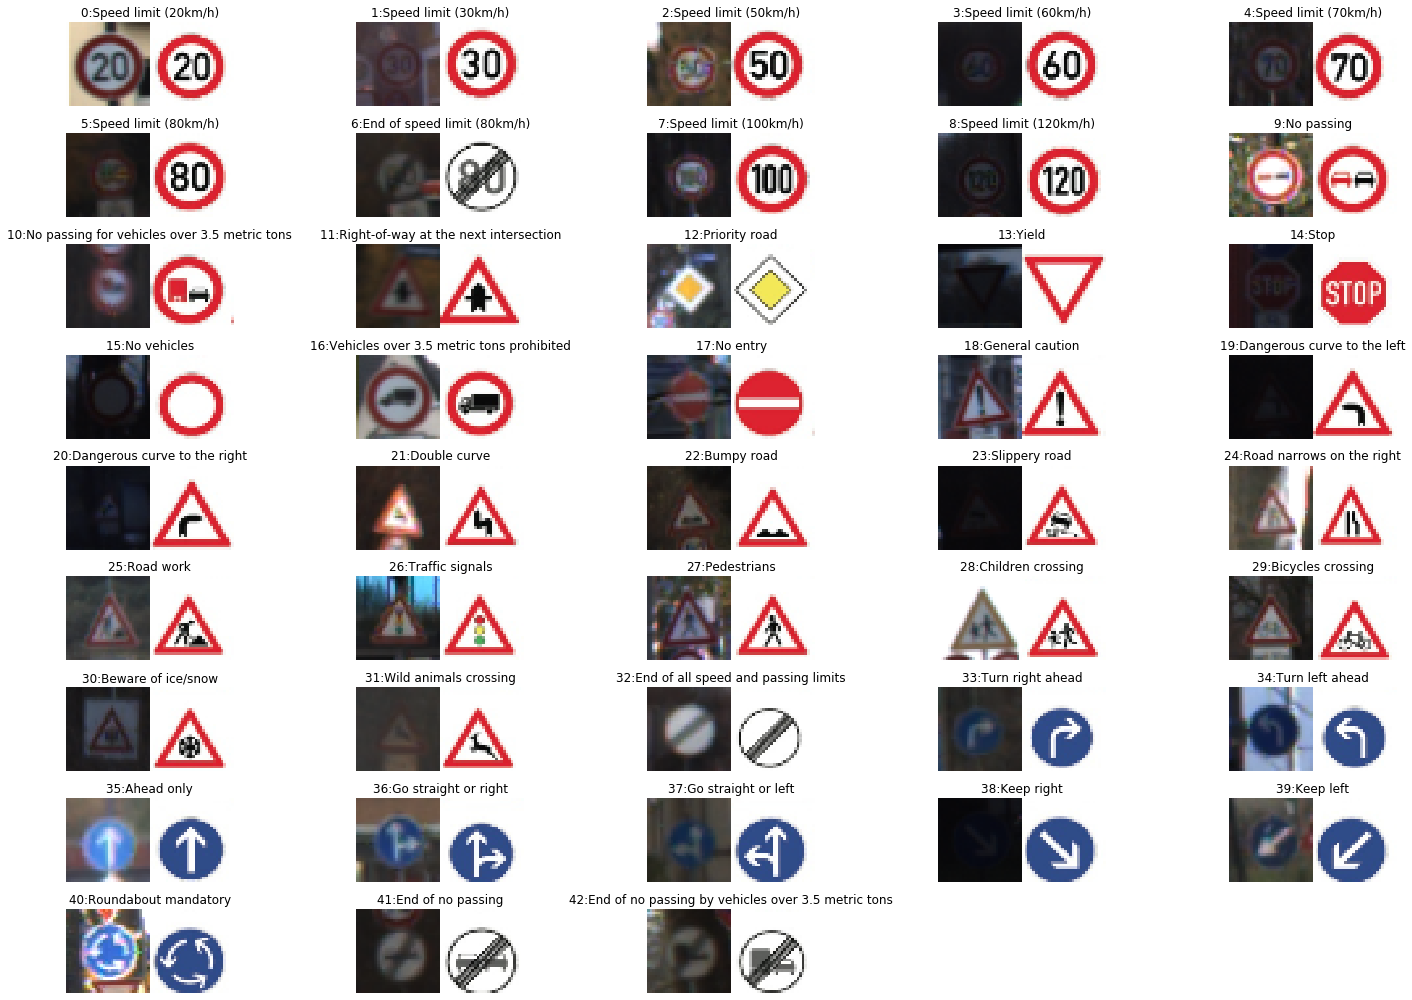

In [11]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcParams.update({'figure.max_open_warning': 0})

h = image_shape[0]
w = image_shape[1]
every_image = 255.0 * np.ones((h, 2 * w, 3), dtype=np.float32)

# The label image 
## Dispaly vecry image of all clases
plt.figure(figsize=(20,14))
for c in range(n_classes):
    plt.subplot(9, 5, c + 1)
    # Pick out the images belonging to c and display one of them 
    sample_image = X_train[y_train == c][0]
    
    # label image
    label_image = get_label_image(c)

    every_image[0:h, 0:w, :] = sample_image
    every_image[0:h, w:2*w, :] = label_image
    plt.imshow(every_image.astype(np.uint8))
    plt.title("{}:{}".format(c, classnames[c]), fontsize=12)
    plt.axis("off")
    
plt.tight_layout()
plt.savefig("./test_images/visulization.png")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

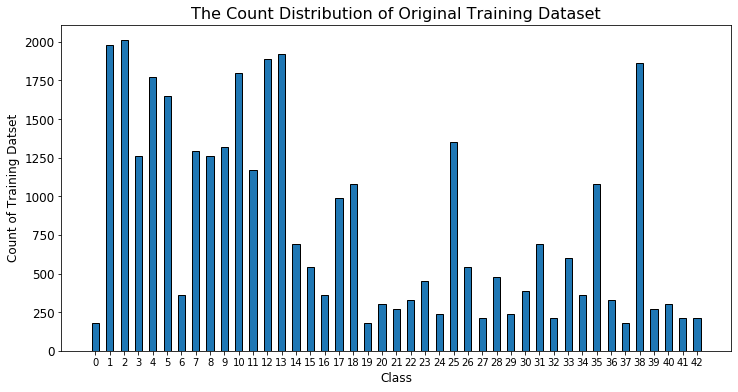

In [20]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Dispaly the number of very calss
classes_num = [len(X_train[y_train == c]) for c in range(n_classes)]
plt.figure(figsize = (12, 6))
plt.bar(range(n_classes), classes_num, width=0.5, align='center', alpha=1, edgecolor='k')
plt.yticks(fontsize=12)
plt.xticks(range(n_classes))
plt.ylabel("Count of Training Datset", fontsize=12)
plt.xlabel("Class", fontsize=12)
plt.title("The Count Distribution of Original Training Dataset", fontsize=16)
plt.show()

From above picture, I found that The dataset is very imbalanced. For example, there are 2010 instances of “speed limit (50 km/h)” sign and correspoding to 2 label, but just 168 instances of “dangerous curve to the left” sign and correspoding to 19 label. I will generate extra data to get rid of the problem.

#### Deal with imblance problem with [torch.utils.data.WeightedRandomSampler](https://pytorch.org/docs/stable/data.html), the datailed codes in dataset.py in the same folder

### Resampling

In [14]:
###############
#Generate data and data augmentation
###############
%load_ext autoreload
%autoreload 2
from dataset import *


classes_num = [len(X_train[y_train == c]) for c in range(n_classes)]
weight = 1. / np.array([classes_num[c] for c in y_train])
sampler = WeightedRandomSampler(weight, n_classes * 2000)

dataset_train = TrafficSignDataset("./data", dataset='train', transform=get_dataset_transform())
train_dataloder = DataLoader(dataset_train, batch_size=32, sampler=sampler)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


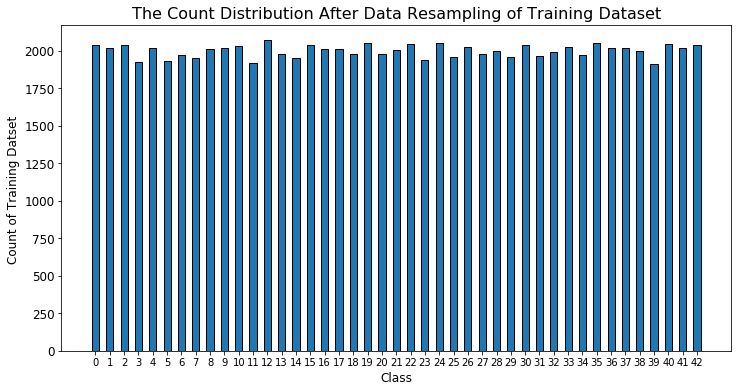

In [19]:
# After data weight resampling, display the images' count distribution
import matplotlib.pyplot as plt
%matplotlib inline

total_labels = torch.LongTensor([])
for images, labels in train_dataloder:
    total_labels = torch.cat((total_labels, labels))
    
plt.figure(figsize = (12, 6))
plt.bar(range(n_classes), np.bincount(total_labels), width=0.5, align='center', alpha=1, edgecolor='k', )
plt.yticks(fontsize=12)
plt.xticks(range(n_classes))
plt.ylabel("Count of Training Datset ", fontsize=12)
plt.xlabel("Class", fontsize=12)
plt.title("The Count Distribution After Data Resampling of Training Dataset", fontsize=16)
plt.show()

In [10]:
# The total number of training dataset after data augumentation
print("The total number of training dataset after data Resampling: ", len(total_labels))

The total number of training dataset after data Resampling:  86000


### Data Augumentation
* Data Augumentation in dataset.py lines 55 - 84.
* For every image ,  I used `transforms.RandomApply`  to randomly choose a distortion with probability 0.5 to augment dataset.  The `transforms` operations are applied to my original images at every batch generation. So my dataset size is left unchanged, only the batch images are copied and transformed every iteration. Geometric Distortions  such as rotation, translate, shear, scale are randomly changed every epoch between given parameters.  `Transforms.RandomRotation(20)` means randomly rotate the original image between -20 degree tp 20 degree.
* Below, I displayed image after augmenting with the specific parameters.

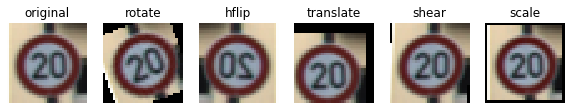

In [50]:
# import torchvision.transforms.functional as TF

# Display the data after distortions
sample = X_train[y_train == 0][0]
# Change numpy.array to PIL
PIL_sample = TF. to_pil_image(sample, mode=None)

# rotation
sample_rotation = TF.rotate(PIL_sample, 20, resample = PIL.Image.BICUBIC)

# hflip
sample_hflip = TF.hflip(PIL_sample)

# translate
sample_translate = transforms.RandomAffine(0, translate=(0.1, 0.2), resample = PIL.Image.BICUBIC)(PIL_sample)

# shear=20
sample_shear = transforms.RandomAffine(0, shear=10, resample=PIL.Image.BICUBIC)(PIL_sample)

# scale=(0.8, 1.2)
sample_scale = transforms.RandomAffine(0, scale=(0.8, 1.2), resample=PIL.Image.BICUBIC)(PIL_sample)

# Plot all images after these distortion
f, axis = plt.subplots(1, 6, figsize=(10, 1.5))

# display the image
title = ['Original', 'Rotate', 'Hflip', 'Translate', 'Shear', 'Scale']
samples = {'Original': sample, 'Rotate': sample_rotation, 'Hflip': sample_hflip, 
           'Translate': sample_translate, 'Shear': sample_shear, 'Scale': sample_scale}

for i, ax in enumerate(axis):
    ax.imshow(samples[title[i]])
    ax.set_title(title[i])
    ax.axis('off')
plt.show()

### Grayscale and Normalized
* The image comes into `transforms.Grayscale()`  converting the image to grayscale with single channel. Then I used `transforms.Totensor()`  to convert a PIL Image or `numpy.ndarray` (H x W x C) in the range [0, 255] to a `torch.FloatTensor` of shape (C x H x W) in the range [0.0, 1.0]. Lastly, the image goes through `transforms.Normalize(mean=(0.5, ),std=(1, ))])`  to get mean zero and unit variance. All of these is in dataset.py lines  52 -80.
* Below, I displayed the grascale image

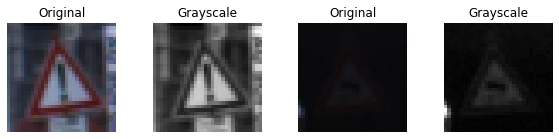

In [62]:
sample1 = sample = X_train[y_train == 18][0]
# Change numpy.array to PIL
PIL_sample1 = TF. to_pil_image(sample1, mode=None)
# transforms.Grayscale()
sample1_grayscale = transforms.Grayscale()(PIL_sample1)


# select dim image to see the performace after grayscaling
sample2 = sample = X_train[y_train == 23][0]
# Change numpy.array to PIL
PIL_sample2 = TF. to_pil_image(sample2, mode=None)
# transforms.Grayscale()
sample2_grayscale = transforms.Grayscale()(PIL_sample2)

f = plt.figure(figsize=(10, 2))
ax1 = f.add_subplot(1, 4, 1)
ax1.imshow(sample1)
ax1.set_title("Original")
ax1.axis("off")

ax2 = f.add_subplot(1, 4, 2)
ax2.imshow(sample1_grayscale, cmap = 'gray')
ax2.set_title("Grayscale")
ax2.axis("off")

ax3 = f.add_subplot(1, 4, 3)
ax3.imshow(sample2)
ax3.set_title("Original")
ax3.axis("off")

ax4 = f.add_subplot(1, 4, 4)
ax4.imshow(sample2_grayscale, cmap='gray')
ax4.set_title("Grayscale")
ax4.axis("off")

plt.show()


### Model Architecture - Based on VGG16
* Less conv layers and fc layers tha original vgg16 is to prevent overfitting

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [6]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import torch
import torch.backends.cudnn as cudnn
import torch.optim as optim
from torch.optim import lr_scheduler
from model import TrafficSignNet

batch_size = 32

cudnn.benchmark = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Training dataset
dataset_train = TrafficSignDataset("../data", dataset='train', transform=get_dataset_transform())
train_dataloder = DataLoader(dataset_train, batch_size=batch_size, sampler=sampler)

# Valid dataset
dataset_valid = TrafficSignDataset("../data", dataset='valid', transform=get_dataset_transform(dataset='valid'))
valid_dataloder = DataLoader(dataset_valid, shuffle=True, batch_size=batch_size)

In [7]:
# Define the model
from model import TrafficSignNet
import torch
import torch.nn as nn
import time

model = TrafficSignNet()
epochs = 200
# # lr = 0.1
# torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, 
# amsgrad=False), This is the default from Pyrotch API
optim = torch.optim.Adam(model.parameters())

# Sets the learning rate of each parameter group to the initial lr decayed by gamma every step_size epochs. 
sheduler = lr_scheduler.StepLR(optim,20,gamma=0.5)
criterion = nn.CrossEntropyLoss()

# Select the cuda or cpu
model = model.to(device)
criterion = criterion.to(device)

train_loss, train_acc = list(), list()
valid_loss, valid_acc = list(), list()
learning_rate = []
total_time = 0

for epoch in range(epochs):
    
    start_time = time.time()
    
    sheduler.step()
    learning_rate.append(optim.state_dict()["param_groups"][0]['lr'])
    
    model.train() # # training mode enables dropout
    train_correct = 0
    train_total = 0
    running_loss = 0.0
    # Batches (training)
    for i, (images, labels) in enumerate(train_dataloder):
        images = images.to(device)
        labels = labels.to(device)
        
        # FP
        train_outputs = model(images)
        # compute the acc
        train_correct += (torch.max(train_outputs, 1)[1].view(labels.size()) == labels).sum().item()
        train_total += labels.size(0)
        
        # Loss
        loss = criterion(train_outputs, labels)
        
        running_loss += float(loss)
        
        # BP
        optim.zero_grad()
        loss.backward()
        
        # Update
        optim.step()
        
    # free some memory 
    del images, labels, train_outputs 
    # print(train_correct, train_total)
    # compute the acc and loss every one epoch
    train_epoch_acc = 100. * train_correct / train_total
    train_epoch_loss = running_loss / (i+1)
    train_loss.append(train_epoch_loss)
    train_acc.append(train_epoch_acc)
        
   # model eval
    model.eval()
        
    valid_total = 0
    valid_correct = 0
    valid_running_loss = 0
    for j, (valid_images, valid_labels) in enumerate(valid_dataloder):
        # print(valid_images.size(), valid_labels.size())
        valid_images = valid_images.to(device)
        valid_labels = valid_labels.to(device)
        valid_outputs = model(valid_images)
        # compute the acc
        valid_correct += (torch.max(valid_outputs, 1)[1].view(valid_labels.size()) == valid_labels).sum().item()
        valid_total += valid_labels.size(0)
        
        
        # Loss
        val_loss = criterion(valid_outputs, valid_labels)
        valid_running_loss += float(val_loss)
    #print(valid_correct, valid_total)
        
    # free some memory 
    del valid_images, valid_labels, valid_outputs 
    
    # compute the acc and loss every one epoch
    valid_epoch_acc = 100. * valid_correct / valid_total
    valid_epoch_loss = valid_running_loss / (j+1) 
    valid_loss.append(valid_epoch_loss)
    valid_acc.append(valid_epoch_acc)
    
    end_time = time.time()
    
    total_time += (end_time - start_time) / 60

    print("Epoch: {}/{}\t"
          "train_loss: {:<6.3f} train_acc: {:<6.3f}\t"
          "valid_loss: {:<6.3f} valid_acc: {:<6.3f}\t" 
          "time:{:<6.3f}min ".format(epoch+1, epochs, train_epoch_loss, train_epoch_acc,
                                                                              valid_epoch_loss, valid_epoch_acc, total_time))
# Save the model
torch.save(model.state_dict(), "./TrafficSign.pt")

Epoch: 1/200	train_loss: 0.944  train_acc: 73.112	valid_loss: 0.403  valid_acc: 88.685	time:0.547 min 
Epoch: 2/200	train_loss: 0.139  train_acc: 95.766	valid_loss: 0.258  valid_acc: 93.401	time:1.095 min 
Epoch: 3/200	train_loss: 0.089  train_acc: 97.364	valid_loss: 0.258  valid_acc: 94.580	time:1.641 min 
Epoch: 4/200	train_loss: 0.073  train_acc: 97.900	valid_loss: 0.253  valid_acc: 94.898	time:2.189 min 
Epoch: 5/200	train_loss: 0.055  train_acc: 98.440	valid_loss: 0.177  valid_acc: 95.964	time:2.737 min 
Epoch: 6/200	train_loss: 0.045  train_acc: 98.699	valid_loss: 0.176  valid_acc: 96.281	time:3.285 min 
Epoch: 7/200	train_loss: 0.039  train_acc: 98.895	valid_loss: 0.176  valid_acc: 95.918	time:3.827 min 
Epoch: 8/200	train_loss: 0.033  train_acc: 99.041	valid_loss: 0.168  valid_acc: 96.304	time:4.371 min 
Epoch: 9/200	train_loss: 0.029  train_acc: 99.187	valid_loss: 0.188  valid_acc: 96.803	time:4.917 min 
Epoch: 10/200	train_loss: 0.027  train_acc: 99.230	valid_loss: 0.104  val

Epoch: 80/200	train_loss: 0.000  train_acc: 99.988	valid_loss: 0.124  valid_acc: 98.639	time:43.051min 
Epoch: 81/200	train_loss: 0.001  train_acc: 99.987	valid_loss: 0.116  valid_acc: 98.549	time:43.583min 
Epoch: 82/200	train_loss: 0.000  train_acc: 99.986	valid_loss: 0.107  valid_acc: 98.594	time:44.109min 
Epoch: 83/200	train_loss: 0.000  train_acc: 99.993	valid_loss: 0.109  valid_acc: 98.662	time:44.646min 
Epoch: 84/200	train_loss: 0.001  train_acc: 99.988	valid_loss: 0.109  valid_acc: 98.617	time:45.177min 
Epoch: 85/200	train_loss: 0.000  train_acc: 99.987	valid_loss: 0.099  valid_acc: 98.798	time:45.703min 
Epoch: 86/200	train_loss: 0.000  train_acc: 99.992	valid_loss: 0.096  valid_acc: 98.617	time:46.234min 
Epoch: 87/200	train_loss: 0.000  train_acc: 99.995	valid_loss: 0.087  valid_acc: 98.798	time:46.758min 
Epoch: 88/200	train_loss: 0.000  train_acc: 99.993	valid_loss: 0.119  valid_acc: 98.549	time:47.289min 
Epoch: 89/200	train_loss: 0.000  train_acc: 99.992	valid_loss: 0

Epoch: 159/200	train_loss: 0.000  train_acc: 99.994	valid_loss: 0.108  valid_acc: 98.707	time:84.588min 
Epoch: 160/200	train_loss: 0.000  train_acc: 99.997	valid_loss: 0.097  valid_acc: 98.662	time:85.117min 
Epoch: 161/200	train_loss: 0.000  train_acc: 99.998	valid_loss: 0.110  valid_acc: 98.730	time:85.648min 
Epoch: 162/200	train_loss: 0.000  train_acc: 99.999	valid_loss: 0.104  valid_acc: 98.753	time:86.180min 
Epoch: 163/200	train_loss: 0.000  train_acc: 99.995	valid_loss: 0.118  valid_acc: 98.662	time:86.712min 
Epoch: 164/200	train_loss: 0.000  train_acc: 99.994	valid_loss: 0.117  valid_acc: 98.617	time:87.246min 
Epoch: 165/200	train_loss: 0.000  train_acc: 99.998	valid_loss: 0.107  valid_acc: 98.776	time:87.784min 
Epoch: 166/200	train_loss: 0.000  train_acc: 99.998	valid_loss: 0.088  valid_acc: 98.730	time:88.310min 
Epoch: 167/200	train_loss: 0.000  train_acc: 99.998	valid_loss: 0.113  valid_acc: 98.639	time:88.836min 
Epoch: 168/200	train_loss: 0.000  train_acc: 99.993	val

### Loss and Accuracy Visualization

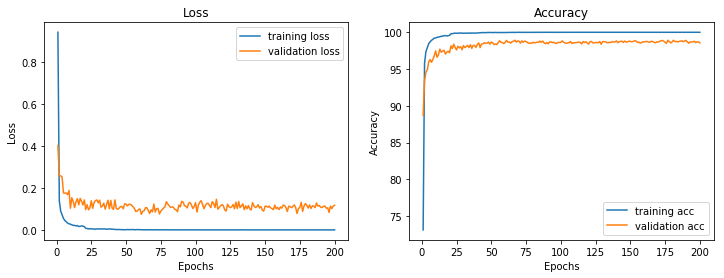

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

f = plt.figure(figsize = (12, 4))

# plot loss 
ax1 = f.add_subplot(1, 2, 1)
ax1.plot(range(1, epochs + 1), train_loss)
ax1.plot(range(1, epochs + 1), valid_loss)
# ax1.plot(range(1, epochs + 1), learning_rate)
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")
ax1.set_title("Loss")
plt.legend(['training loss', 'validation loss'], loc='upper right')

# plot acc 
ax2 = f.add_subplot(1, 2, 2)
ax2.plot(range(1, epochs + 1), train_acc)
ax2.plot(range(1, epochs + 1), valid_acc)
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
ax2.set_title("Accuracy")
plt.legend(['training acc', 'validation acc'], loc='lower right')

### Test Datase Accuracy and Error Analysis

In [9]:
def compute_acc(dataset):
    """
    Compute the training and valid accuracy
    """
    
    all_labels, all_preds, all_images = list(), list(), list()
    
    for k, (images, labels) in enumerate(dataset):
        # print(valid_images.size(), valid_labels.size())
        trafficSignNet.eval()

    #     test_images = test_images.to(device)
    #     print(test_images.size())
    #     test_labels = test_labels.to(device)

        predictions = trafficSignNet(images)
        pred_labels = torch.max(predictions, 1)[1].view(labels.size())

        # total test images, predictions and corrosponding labels
        all_labels.extend(labels)
        all_preds.extend(pred_labels)
        all_images.extend(images)

    # free some memory 
    del images, labels, predictions

    all_labels = torch.cat([all_labels[i].unsqueeze(0) for i in range(len(all_labels))])
    all_preds = torch.cat([all_preds[i].unsqueeze(0) for i in range(len(all_preds))])
    all_images = torch.cat([all_images[i].unsqueeze(0) for i in range(len(all_images))])

    # Compute the test accuracy
    acc = 100 * np.mean((all_labels == all_preds).numpy())
    
    return acc

In [10]:
# Load the trained model
from model import TrafficSignNet
from dataset import *
import torch

trafficSignNet = TrafficSignNet()
trafficSignNet.load_state_dict(torch.load('./TrafficSign.pt'))

# Testing datset 
dataset_test = TrafficSignDataset("../data", dataset='test', transform=get_dataset_transform(dataset='test'))
test_dataloder = DataLoader(dataset_test, batch_size=32)

train_acc = compute_acc(train_dataloder)
valid_acc = compute_acc(valid_dataloder)

all_test_labels, all_test_preds, all_test_images = list(), list(), list()

for k, (test_images, test_labels) in enumerate(test_dataloder):
    # print(valid_images.size(), valid_labels.size())
    trafficSignNet.eval()
    
#     test_images = test_images.to(device)
#     print(test_images.size())
#     test_labels = test_labels.to(device)
    
    predictions = trafficSignNet(test_images)
    pred_labels = torch.max(predictions, 1)[1].view(test_labels.size())
    
    # total test images, predictions and corrosponding labels
    all_test_labels.extend(test_labels)
    all_test_preds.extend(pred_labels)
    all_test_images.extend(test_images)

# free some memory 
del test_images, test_labels, predictions
    
all_test_labels = torch.cat([all_test_labels[i].unsqueeze(0) for i in range(len(all_test_labels))])
all_test_preds = torch.cat([all_test_preds[i].unsqueeze(0) for i in range(len(all_test_preds))])
all_test_images = torch.cat([all_test_images[i].unsqueeze(0) for i in range(len(all_test_images))])

# Compute the test accuracy
test_acc = 100 * np.mean((all_test_labels == all_test_preds).numpy())
print("The accuracy of train dataset: {:.3f}%".format(train_acc))
print("The accuracy of valid dataset: {:.3f}%".format(valid_acc))
print("The accuracy of test dataset: {:.3f}%".format(test_acc))


The accuracy of train dataset: 99.999%
The accuracy of valid dataset: 98.889%
The accuracy of test dataset: 97.514%


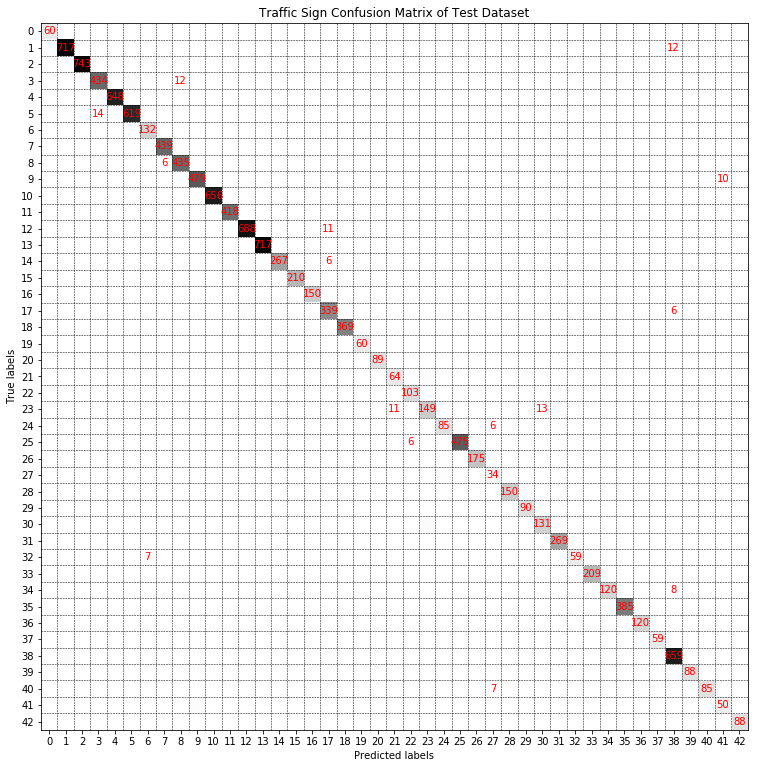

In [11]:
# # Error analysis
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

# Confuse matrix
plt.figure(figsize=(13, 13))
cm = confusion_matrix(all_test_labels, all_test_preds)
plt.imshow(cm, cmap = plt.cm.binary)

# add annotation
for x in range(len(cm)):
    for y in range(len(cm)):
        if cm[x, y] > 5:
            plt.annotate(cm[x, y], (x, y), color = 'red', horizontalalignment = 'center', verticalalignment = 'center')
            
tick_marks = np.arange(len(classnames))
ax = plt.gca()
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)

plt.xlabel("Predicted labels")
# ax.xaxis.set_label_position('top')

plt.ylabel("True labels",)
plt.title("Traffic Sign Confusion Matrix of Test Dataset")

# Draw grid

pos = np.arange(0.5, 42.5, 1)
for i in range(len(pos)):
    plt.axhline(pos[i], linestyle='--', color='k', lw = 0.5)
    plt.axvline(pos[i], linestyle='--', color='k', lw = 0.5)
plt.show()    

In [ ]:
# incorrect_preds_index = (all_test_labels !== all_test_preds).numpy().nonzero()

# i = 0
# result_image = 255 * np.zeros((60, 32, 3), dtype = np.float32)
# for ind in random.choice(incorrect_preds_index, 5):
#     original_image = all_test_images[indx]
#     pred_label = all_test_preds[ind]
#     actual_label = all_test_labels[indx]
#     result_image[:32, :, :] = original_image
    
#     cv2.putText(result_image, "Actual label: {} {}".format(actual_label, classnames[actual_label])
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,40,0),1)
    
#     cv2.putText(result_image, "Predicted label: {} {}".format(pred__label, classnames[pred_label])
#                 cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,40,0),1)
    
#     plt.imshow(result_image.astype(np.uint8))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

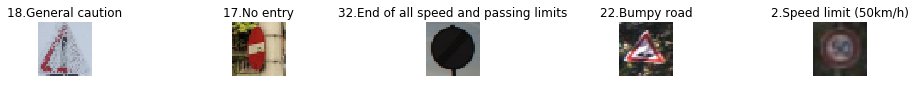

In [12]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import cv2

# All the images are manually cropped out of the real image, see test_images folder
# I paid much attentation to choose some pictures that are hardly classified.
test_images = ['001.png',  # hide from snow
               '002.png',  # tilt
               '003.png',  # dim at night
               '004.png',  # normal but influenced by tree shade
               '005.png']  # far away and blur

test_true_labels = [18, 17, 32, 22,  2]
# Display the new images
imgs = []
plt.figure(figsize=(13, 1.5))
for i in range(len(test_images)):
    img = mpimg.imread("../test_images/{}".format(test_images[i]))
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    img = (cv2.resize(img, (32, 32)) * 255).astype(np.uint8)
    imgs.append(img)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title("{}.{}".format(test_true_labels[i], classnames[test_true_labels[i]]))
    plt.axis("off")

plt.tight_layout()  
plt.show() 

### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
from torchvision import transforms

# The images should be pre_processing as the dateset of training
transform = transforms.Compose([transforms.ToPILImage(),
                                transforms.Grayscale(),
                                transforms.ToTensor(),
                                transforms.Normalize(mean=(0.5, ), 
                                                     std=(1, ))])# Mean center data

transform_imgs = [transform(imgs[i]) for i in range(len(imgs))]

# Predict
pred_labels = []
all_preds = []
for img in transform_imgs:
    img = img.unsqueeze(0)
    preds = trafficSignNet(img)
    #print(preds)
    all_preds.append(preds)
    pred_label = preds.max(dim=1)[1]
    pred_labels.append(pred_label)    

### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
predicted_labels = [pred_labels[i].item() for i in range(len(pred_labels))]
print(predicted_labels)

[18, 13, 32, 22, 2]


In [15]:
print(test_true_labels)

[18, 17, 32, 22, 2]


| New images from web | True labels | Predicted labels | 
| :------ | :------ | :------ | 
|001.png |18:General caution |18:General caution |
|002.png |17:No entry |13:Yeild |
|003.png |32:End of all speed and passing limits |32:End of all speed and passing limits |
|004.png |22:Bumpy road |22:Bumpy road |
|005.png |2:Speed limit (50km/h) |2:Speed limit (50km/h) |

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image).[`torch.topk(x, n, sorted, dim)`](https://pytorch.org/docs/stable/torch.html#torch.topk) could prove helpful here.
The example below demonstrates how torch.topk can be used to find the top k predictions for each image.

`torch.topk` will return the k largest elements of the given input tensor along a given dimension. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this tensors as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `torch.topk` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = torch.tensor([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `torch.topk(a, 3, dim=1)` produces:

```
TopKV2values=tensor([[0.3476, 0.2488, 0.1279],
                     [0.2809, 0.2757, 0.1806],
                     [0.2608, 0.2389, 0.2366],
                     [0.2920, 0.2623, 0.1651],
                     [0.3440, 0.2421, 0.1624]]),
indices=tensor([[3, 0, 5],
                [0, 1, 4],
                [0, 5, 1],
                [1, 3, 5],
                [1, 4, 3]]))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
all_preds = torch.cat(all_preds)  # (5, 43)
all_preds_softmax = torch.nn.Softmax(dim=1)(all_preds)
top5_prob, top5_index = torch.topk(all_preds_softmax, 5, dim = 1)

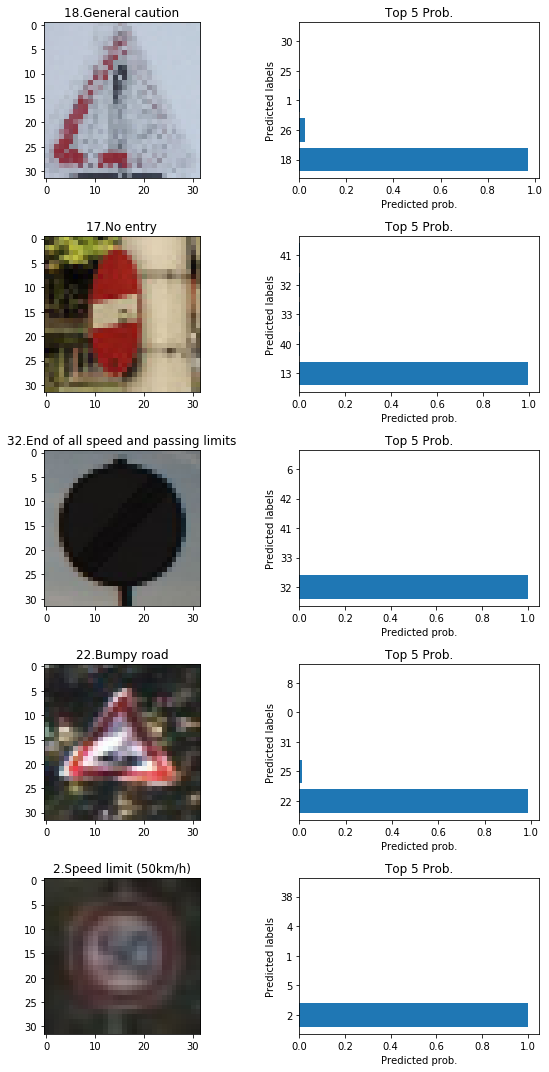

In [24]:
# Display the probability
f, axis = plt.subplots(5, 2, figsize=(8, 15))
for i in range(len(top5_prob)):
    axis[i, 0].imshow(imgs[i])
    axis[i, 0].set_title("{}.{}".format(test_true_labels[i], classnames[test_true_labels[i]]))

    # y is the top 5 predicted labels
    y = top5_index[i].detach().numpy()
    # x is the top 5 prob.
    axis[i, 1].barh(range(len(y)), top5_prob[i].detach().numpy())
    axis[i, 1].set_yticks(range(len(y)))
    axis[i, 1].set_yticklabels(list(y))
    axis[i, 1].set_title("Top 5 Prob.")
    axis[i, 1].set_ylabel("Predicted labels")
    axis[i, 1].set_xlabel("Predicted prob.")
    
plt.tight_layout()
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")